In [39]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# importa biblioteca para leitura de arquivos FITS
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [41]:
# abrindo arquivo contendo 1024 espectros (imagem de 32x32 pts)
f = fits.open('./2018-05-30_17-01-hiper-tip-down-32x32-5seg-400nm.fits')

In [42]:
# obtem informações sobre o conteúdo do arquivo carregado
f.info()

Filename: /Users/cassianorabelo/Dropbox/LA3IC/2018-02-06 Investigacoes nano/03_CODE/2018-05-30_17-01-hiper-tip-down-32x32-5seg-400nm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      84   (1024, 1024)   float32   


In [43]:
# obtem as informacoes existentes no chamado PrimaryHDU
header = f[0].header
raywavelength = header['RAYWAVE'] # obtem o comprimento de onda da excitação
pts_per_spectra = header['NAXIS1'] # obtem o num. de pontos por espectro

In [44]:

calib_data = header['CALIB'].split(',')

In [45]:
# obtem os dados de calibração existentes no arquivo, converte para float e aloca em uma lista
calib_data = list(map(float, header['CALIB'].split(',')))
calib_data.reverse()

In [46]:
# utiliza a calibração existente no arquivo para criar o eixo-X
x = np.arange(1, pts_per_spectra+1)
x_in_nanometers = np.polyval(calib_data, x) # eixo-X em nanômetros
x_in_ramanshift = 1e7/raywavelength - 1e7/x_in_nanometers # converte o eixo-X de nanômetro para Raman Shift

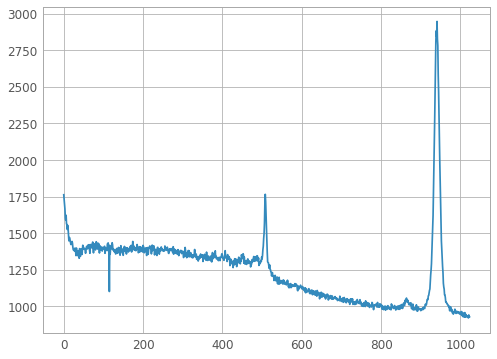

In [47]:
# plota o primeiro espectro
plt.plot(data[0])

In [48]:
f.close()